# Fuel Efficiency Analysis

## Best Subset Selection (Student)

Instructions:
* Run subset selection on the mtcars data
* Does the R-squared always increase and RSS always decrease when the model has more variables? Why?
* Generate line plots of RSS, Adjusted R-squared, Cp and BIC vs number of features
* Show the coefficients of the best model and interpret it

In [1]:
# load the leaps library which is available in conda's r channel
# see the instructions in install-instructions/README.md
library(leaps)

In [2]:
# use subset selection to find the best model for mpg for every number of variables

to = proc.time()

reg_fit_full = regsubsets(mpg ~ ., data=mtcars, nvmax=10)
tf = proc.time()
tf - to

reg_summary = summary(reg_fit_full)
reg_summary

   user  system elapsed 
  0.007   0.001   0.009 

Subset selection object
Call: regsubsets.formula(mpg ~ ., data = mtcars, nvmax = 10)
10 Variables  (and intercept)
     Forced in Forced out
cyl      FALSE      FALSE
disp     FALSE      FALSE
hp       FALSE      FALSE
drat     FALSE      FALSE
wt       FALSE      FALSE
qsec     FALSE      FALSE
vs       FALSE      FALSE
am       FALSE      FALSE
gear     FALSE      FALSE
carb     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: exhaustive
          cyl disp hp  drat wt  qsec vs  am  gear carb
1  ( 1 )  " " " "  " " " "  "*" " "  " " " " " "  " " 
2  ( 1 )  "*" " "  " " " "  "*" " "  " " " " " "  " " 
3  ( 1 )  " " " "  " " " "  "*" "*"  " " "*" " "  " " 
4  ( 1 )  " " " "  "*" " "  "*" "*"  " " "*" " "  " " 
5  ( 1 )  " " "*"  "*" " "  "*" "*"  " " "*" " "  " " 
6  ( 1 )  " " "*"  "*" "*"  "*" "*"  " " "*" " "  " " 
7  ( 1 )  " " "*"  "*" "*"  "*" "*"  " " "*" "*"  " " 
8  ( 1 )  " " "*"  "*" "*"  "*" "*"  " " "*" "*"  "*" 
9  ( 1 )  " " "*"  "*" "*"  "*" "*"  "*"

In [3]:
# see the R-squared for the best model with idx variables
reg_summary$rsq

[1] 0.7528328 0.8302274 0.8496636 0.8578510 0.8637377 0.8667078 0.8680976
 [8] 0.8687064 0.8689448 0.8690158

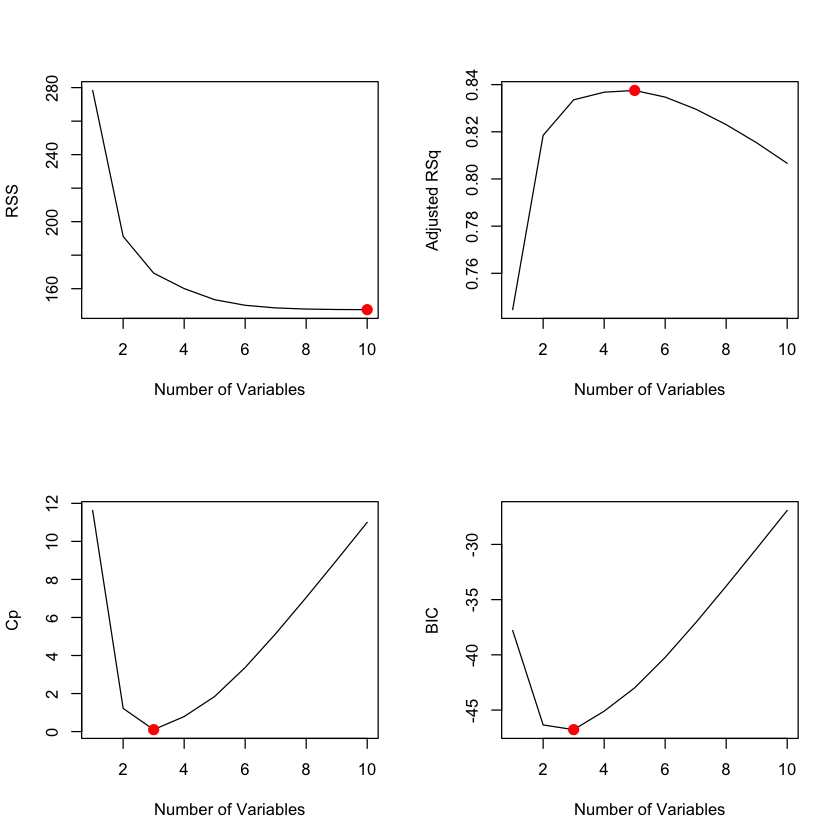

In [4]:
# plot number of variables for the best model against the associated RSS, Adjusted R-Squared, Cp and BIC. 
par(mfrow=c(2, 2))

plot(reg_summary$rss, xlab="Number of Variables", ylab="RSS", type="l")
points(
    which.min(reg_summary$rss),
    min(reg_summary$rss),
    col="red",
    cex=2,
    pch=20
)

plot(reg_summary$adjr2, xlab="Number of Variables", ylab="Adjusted RSq", type="l")
points(
    which.max(reg_summary$adjr2),
    max(reg_summary$adjr2),
    col="red",
    cex=2,
    pch=20
)

plot(reg_summary$cp, xlab="Number of Variables", ylab="Cp", type="l")
points(
    which.min(reg_summary$cp),
    min(reg_summary$cp),
    col="red",
    cex=2,
    pch=20
)

plot(reg_summary$bic, xlab="Number of Variables", ylab="BIC", type="l")
points(
    which.min(reg_summary$bic),
    min(reg_summary$bic),
    col="red",
    cex=2,
    pch=20
)

In [5]:
# see the coefficients for the best model with 3 variables
coef(reg_fit_full, 3)

(Intercept)          wt        qsec          am 
   9.617781   -3.916504    1.225886    2.935837